# NBA Fantasy Projection Model

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Cleaning data

### Defining stats

In [2]:
stats = ['pts',  #points
        'min',   #minutes
        'fgm',   #field goals made
        'fga',   #field goals attempted
        'fg3m',  #3pt field goals made
        'fg3a',  #3pt field goals attempted
        'ftm',   #free throws made
        'fta',   #free throws attempted
        'oreb',  #offensive rebounds
        'dreb',  #defensive rebounds
        'ast',   #assists
        'stl',   #steals
        'tov',   #turnovers
        'blk',]  #blocks

### Importing csv file

In [3]:
#read in per game data csv file
df = pd.read_csv('player_general_traditional_per_game_data.csv')

#show 5 random rows
df.sample(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
5764,201234,2008-09,4.0,24.0,3.5,0.0,1.3,0.000,0.0,0.0,...,1.0,1.0,1.000,0.0,0.3,0.0,0.3,0.0,0.0,1.0
1825,713,2000-01,35.0,27.0,8.8,1.5,3.2,0.473,0.5,1.1,...,1.3,1.7,0.767,0.3,0.9,0.3,0.5,0.1,0.1,4.8
8623,200745,2015-16,46.0,30.0,13.8,2.8,6.1,0.455,0.1,0.3,...,1.0,1.2,0.825,0.6,1.5,0.4,0.6,0.1,0.2,6.6
4218,2693,2005-06,66.0,26.0,18.7,1.8,5.2,0.353,0.4,1.2,...,1.6,2.0,0.797,0.2,1.0,2.3,1.2,0.6,0.1,5.6
2988,1739,2002-03,78.0,27.0,21.3,3.3,6.6,0.492,0.0,0.3,...,1.8,2.8,0.627,1.5,1.8,1.3,1.5,0.9,0.4,8.3


In [4]:
#columns names
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

### Dropping rows with missing values

In [5]:
df_cleaned = df.dropna(how = 'all') #drop rows missing all values only

### Dropping outliers

In [6]:
#Games played description
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [7]:
#How many players played over 3 games std below mean --> outliers?
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)
min_gp #negative = too low

-22.712012335693522

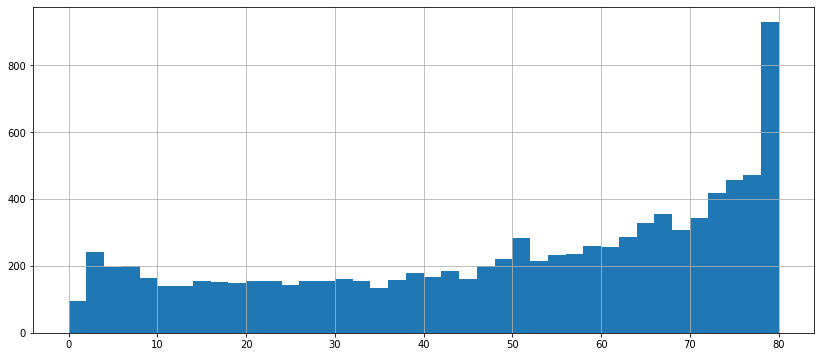

In [8]:
# --->Histogram check
bin_values = np.arange(start = 0, stop = 82, step = 2) # (82 nba regular season game per team), 1 bar per 2 games
df_cleaned['gp'].hist(bins=bin_values, figsize=[14, 6])

In [9]:
#on histogram, significant number of players increase from 10 games --> 10 games a season per player (or less) = outliers
min_gp = 10

#filter out players who played 10 games or less (oultliers)
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

#how many outliers dropped?
df_cleaned['player_id'].count() - df_filter['player_id'].count()

971

## Normalizing data across seasons

In [10]:
# Normalize since accross decades gameplays and rules have been changing considerably

# --> function factoring in the season stats, max & min values --> normalize

### Creating Dataframe with only current season data

In [11]:
season = (df_filter['season_id'] == '2017-18')

df_2018 = df_filter[season]
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9573,202692,2017-18,64.0,26.0,16.5,2.7,6.5,0.411,0.7,2.2,...,1.7,1.9,0.863,0.3,2.7,1.0,0.9,0.6,0.1,7.7
9875,2594,2017-18,73.0,37.0,21.6,3.0,6.6,0.459,2.2,5.2,...,0.9,1.0,0.889,0.1,2.1,1.2,0.8,0.4,0.4,9.2
9706,2730,2017-18,81.0,32.0,30.4,6.2,11.2,0.555,0.0,0.1,...,4.1,7.2,0.574,3.1,9.3,1.3,2.6,0.6,1.6,16.6
9758,1627826,2017-18,43.0,21.0,9.5,1.4,2.8,0.500,0.0,0.0,...,0.9,1.2,0.765,1.0,1.8,0.6,0.6,0.2,0.3,3.7
9982,1627835,2017-18,54.0,24.0,15.3,1.5,4.3,0.346,0.7,2.0,...,0.4,0.5,0.760,0.2,2.2,0.9,0.8,0.4,0.3,4.0
9636,1626191,2017-18,19.0,23.0,4.7,0.9,2.2,0.429,0.1,0.4,...,0.5,0.7,0.643,0.4,0.9,0.2,0.1,0.0,0.3,2.4
10073,201936,2017-18,52.0,28.0,30.9,7.0,15.6,0.452,2.2,5.5,...,3.2,4.0,0.785,0.8,4.3,5.2,2.3,1.1,0.3,19.4
10020,1627885,2017-18,23.0,24.0,16.7,2.6,5.4,0.476,0.3,1.1,...,1.2,1.7,0.737,0.4,2.3,2.4,1.0,1.1,0.3,6.6
9734,1627834,2017-18,17.0,20.0,7.2,1.1,2.5,0.429,0.0,0.0,...,0.0,0.0,0.000,0.8,1.4,0.5,0.5,0.2,0.4,2.1
9642,202709,2017-18,82.0,26.0,27.0,3.1,7.4,0.424,0.8,2.3,...,0.9,1.1,0.745,0.5,2.7,3.2,1.1,1.0,0.2,7.9


### Adding column with normalized points

In [12]:
# to normalize --> (value  - min)/(max - min)

df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

# sort most points to least, top 10
df_2018.sort_values('pts_norm', ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


### Duplicating process for each other stat columns and turning it into a function

In [13]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

cols_to_norm = stats

# --> for loop taking dataframe as input and return updated dataframe with normalized columns
def vorp(df): # vorp = value of replacement
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name]) #add '_norm' to column name
    return df

df_2018_norm = vorp(df_2018)

df_2018_norm.sample(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9691,2734,2017-18,71.0,35.0,18.9,2.6,6.4,0.412,1.1,3.2,...,0.261905,0.32,0.229885,0.237624,0.039216,0.130841,0.203883,0.291667,0.22,0.076923
9818,203089,2017-18,76.0,27.0,25.9,3.8,6.6,0.572,0.0,0.1,...,0.000000,0.01,0.137931,0.207921,0.392157,0.429907,0.145631,0.250000,0.22,0.538462
9671,1628368,2017-18,73.0,20.0,27.7,4.5,10.9,0.412,0.6,2.1,...,0.142857,0.21,0.218391,0.267327,0.098039,0.196262,0.427184,0.416667,0.48,0.115385
10027,1626169,2017-18,69.0,22.0,27.4,3.0,8.1,0.375,1.0,3.4,...,0.238095,0.34,0.183908,0.207921,0.098039,0.280374,0.155340,0.583333,0.22,0.076923
9803,203087,2017-18,80.0,26.0,24.6,4.8,10.4,0.457,1.2,3.2,...,0.285714,0.32,0.252874,0.257426,0.117647,0.299065,0.223301,0.333333,0.24,0.153846
9620,1627854,2017-18,80.0,24.0,19.0,2.6,6.2,0.421,1.1,2.9,...,0.261905,0.29,0.068966,0.089109,0.039216,0.093458,0.097087,0.166667,0.10,0.000000
9868,202691,2017-18,73.0,28.0,34.3,7.9,16.1,0.489,3.1,7.1,...,0.738095,0.71,0.126437,0.128713,0.078431,0.299065,0.242718,0.333333,0.36,0.192308
9812,2207,2017-18,55.0,37.0,21.9,2.7,6.5,0.406,0.7,2.6,...,0.166667,0.26,0.080460,0.079208,0.058824,0.252336,0.145631,0.125000,0.18,0.038462
10084,201961,2017-18,77.0,30.0,26.5,3.7,9.1,0.407,2.9,7.5,...,0.690476,0.75,0.103448,0.099010,0.058824,0.214953,0.097087,0.291667,0.14,0.038462
9607,201628,2017-18,20.0,33.0,5.7,1.0,2.9,0.328,0.6,2.0,...,0.142857,0.20,0.011494,0.009901,0.000000,0.018692,0.058252,0.083333,0.10,0.000000


### Applying function on whole dataframe (every season)

In [14]:
# group by season id
grouped = df_filter.groupby('season_id')

#check if okay
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [15]:
df_new = df_filter.groupby(['season_id']).apply(vorp)
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
3873,2446,2004-05,65.0,26.0,18.4,2.5,6.3,0.399,0.9,2.4,...,0.310345,0.300000,0.068966,0.066667,0.051282,0.192308,0.086957,0.103448,0.130435,0.121212
8229,1717,2014-15,77.0,37.0,29.6,6.3,13.8,0.459,1.4,3.6,...,0.388889,0.444444,0.375000,0.372549,0.113208,0.530000,0.178218,0.217391,0.250000,0.137931
2587,2031,2001-02,68.0,22.0,26.5,4.3,9.0,0.480,0.0,0.0,...,0.000000,0.000000,0.405063,0.420561,0.480000,0.419355,0.055556,0.285714,0.435897,0.485714
1953,147,2000-01,72.0,28.0,40.9,7.9,17.3,0.457,0.8,2.4,...,0.296296,0.324324,0.481928,0.366412,0.121951,0.467391,0.612245,0.333333,0.707317,0.162162
6300,2365,2010-11,45.0,32.0,16.3,1.8,3.0,0.599,0.0,0.0,...,0.000000,0.000000,0.250000,0.256410,0.377778,0.278846,0.035088,0.208333,0.153846,0.500000
9698,1627734,2017-18,74.0,22.0,24.5,4.6,8.9,0.514,0.2,0.5,...,0.047619,0.050000,0.264368,0.297030,0.431373,0.495327,0.194175,0.208333,0.380000,0.153846
7072,201155,2011-12,55.0,26.0,29.9,4.7,10.9,0.429,0.6,1.9,...,0.222222,0.275362,0.710145,0.547170,0.159091,0.144231,0.324786,0.320000,0.461538,0.054054
1122,1522,1998-99,39.0,24.0,11.0,1.3,3.9,0.325,0.0,0.3,...,0.000000,0.042254,0.064935,0.107843,0.104167,0.163043,0.092593,0.222222,0.250000,0.076923
5518,2063,2008-09,38.0,31.0,6.3,0.3,1.2,0.267,0.0,0.0,...,0.000000,0.000000,0.033333,0.037383,0.139535,0.073684,0.018182,0.035714,0.078947,0.034483
7188,203382,2012-13,16.0,26.0,8.8,1.1,2.3,0.500,0.0,0.1,...,0.000000,0.012987,0.046512,0.078431,0.145455,0.107843,0.027027,0.041667,0.179487,0.133333


## Player distance function

In [16]:
# Player distance function needed: how close 2 players are or any given stats
# top 10 players with shortest distance (= most similar seasons)

### Calc distance function

In [17]:
# simplified result with just one number

def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2)) #Euclidean distance
    return dist

### Testing the function with a few players

In [18]:
# Let's test with Last season's Damian Lillard ppg (points per game) with Stephen Curry and Rudy Gobert

# Datasets merge to get player id and player name on same dataframe and points column

In [19]:
#player id, player name
df1 = pd.read_csv('player_id_player_name.csv')
#all players data but only player id, season id and points
df2 = pd.read_csv('player_general_traditional_per_game_data.csv', usecols = ['player_id', 'season_id', 'pts'])
# Merge dataframes together with left join
df3 = pd.merge(df1, df2, on = 'player_id', how = 'left')

display(df1.head())
display(df2.head())
display(df3.head())

,player_id,player_name
0,1627773,AJ Hammons
1,201166,Aaron Brooks
2,203932,Aaron Gordon
3,1626151,Aaron Harrison
4,203940,Adreian Payne


,player_id,season_id,pts
0,471,1996-97,3.4
1,920,1996-97,7.2
2,243,1996-97,5.2
3,1425,1996-97,6.2
4,768,1996-97,4.0


,player_id,player_name,season_id,pts
0,1627773,AJ Hammons,2016-17,2.2
1,201166,Aaron Brooks,2007-08,5.2
2,201166,Aaron Brooks,2008-09,11.2
3,201166,Aaron Brooks,2009-10,19.6
4,201166,Aaron Brooks,2010-11,10.7


In [20]:
# filter by season id and save it as new dataframe 2018-19 season
df_2019 = df3[df3['season_id'] == '2018-19']
df_2019.sample(5)

,player_id,player_name,season_id,pts
1490,201145,Jeff Green,2018-19,12.3
1789,1626159,Justise Winslow,2018-19,12.6
465,1627747,Caris LeVert,2018-19,13.7
507,1627767,Cheick Diallo,2018-19,6.0
441,203468,CJ McCollum,2018-19,21.0


In [21]:
# create dataframe for each player by filtering on player name
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

# within dataframe convert points to a list and access first (in this case only) item of the list to save it as variable
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

# run calc function for each pairing

In [22]:
dame_curry = dame_df.append(curry_df)
all_3 = dame_curry.append(rudy_df)
all_3

,player_id,player_name,season_id,pts
636,203081,Damian Lillard,2018-19,25.8
3020,201939,Stephen Curry,2018-19,27.3
2879,203497,Rudy Gobert,2018-19,15.9


In [23]:
print(calc_distance(dame_ppg, curry_ppg)) # 27.3 - 25.8 = 1.5
print(calc_distance(dame_ppg, rudy_ppg)) # 25.8 - 15.9 = 9.9
print(calc_distance(rudy_ppg, curry_ppg)) # 27.3 - 15.9 = 11.4

1.5
9.9
11.4


## Find player function

In [24]:
# ability to find a row of data based on player id and season id
# --> loop over dataframe and check to see if player id and season id both match player input
# --> itertuples method to loop over dataframes

### Using the itertuple method

In [25]:
dataframe = pd.read_csv('player_general_traditional_per_game_data.csv')
df_example = dataframe.sample(10)
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
7656,1712,2013-14,22.0,38.0,11.3,1.3,4.2,0.315,0.4,1.9,...,0.8,1.1,0.720,0.4,2.1,0.3,0.3,0.4,0.1,3.8
10077,2617,2017-18,14.0,38.0,5.1,0.2,1.1,0.200,0.1,0.6,...,0.1,0.1,0.500,0.2,0.5,0.4,0.1,0.0,0.1,0.6
1122,1522,1998-99,39.0,24.0,11.0,1.3,3.9,0.325,0.0,0.3,...,0.5,1.1,0.500,0.6,1.7,1.0,1.0,0.6,0.3,3.1
7280,2734,2012-13,58.0,30.0,24.5,3.3,7.6,0.438,1.3,4.0,...,1.9,2.7,0.727,0.1,1.9,3.4,1.5,1.1,0.2,9.9
1900,224,2000-01,63.0,29.0,36.1,6.2,13.8,0.445,1.4,3.8,...,3.6,4.3,0.844,1.2,3.4,2.7,2.1,1.7,0.9,17.4
4130,727,2005-06,82.0,33.0,28.7,2.0,4.9,0.409,0.0,0.1,...,0.8,1.1,0.688,0.5,2.0,4.2,1.4,0.9,0.2,4.8
2398,679,2001-02,23.0,29.0,12.4,1.6,3.1,0.500,0.0,0.0,...,1.2,1.9,0.628,1.0,1.1,0.5,0.8,0.2,0.2,4.3
1135,977,1998-99,50.0,20.0,37.9,7.2,15.6,0.465,0.5,2.0,...,4.9,5.8,0.839,1.1,4.2,3.8,3.1,1.4,1.0,19.9
3308,703,2003-04,80.0,31.0,31.8,4.9,10.4,0.473,0.0,0.0,...,1.3,1.6,0.835,1.8,6.5,1.9,1.7,0.7,1.0,11.1
2615,238,2001-02,26.0,34.0,31.1,2.7,7.0,0.390,0.0,0.0,...,2.6,4.0,0.650,3.0,7.5,0.9,1.8,0.7,0.5,8.0


In [26]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row
        
find_player(201229, '2014-15')

In [27]:
# Add Dataframe within function

def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row
        
player  = 2544 #LeBron James
season = '2012-13'
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

## Calculating player similarity

In [28]:
# Find most similar players seasons
# --> take normalized stats from single player --> put them in an array
# --> compare with other player's --> put player's in another array
# --> use calc distance function to find absolute distance between them
# --> find percent error
# --> compare 1st player with everyone one by one
# --> sort it and  take 10 most players similar seasons from find percent error

### Focus on one player

In [29]:
# focus on 2016-17
current_player_id = 201950 #Jrue Holiday
current_player_season = '2016-17'

#recap

df = pd.read_csv('player_general_traditional_per_game_data.csv')

df_cleaned = df.dropna(how = 'all') #drop rows missing all values only

#on histogram, significant number of players increase from 10 games --> 10 games a season per player (or less) = outliers
min_gp = 10

#filter out players who played 10 games or less (oultliers)
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

stats = ['pts',  #points
        'min',   #minutes
        'fgm',   #field goals made
        'fga',   #field goals attempted
        'fg3m',  #3pt field goals made
        'fg3a',  #3pt field goals attempted
        'ftm',   #free throws made
        'fta',   #free throws attempted
        'oreb',  #offensive rebounds
        'dreb',  #defensive rebounds
        'ast',   #assists
        'stl',   #steals
        'tov',   #turnovers
        'blk',]  #blocks

cols_to_norm = stats

# --> for loop taking dataframe as input and return updated dataframe with normalized columns
def vorp(df): # vorp = value of replacement
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name]) #add '_norm' to column name
    return df

df_norm = df_filter.groupby(['season_id']).apply(vorp)

# filter on player id = player id and season id = current season
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['season_id'] == current_player_season),
            'pts_norm']).item()

jrue_pts_norm #normalized ppg of that player that season

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: `item` has been deprecated and will be removed in a future version


0.474025974025974

In [30]:
#same for all stats

current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item() 
]

# maths will be a lot easier and more efficient with array
current_player_vector = np.array(current_player_stats)
current_player_vector

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':
C:\Pro

array([0.47402597, 0.85302594, 0.57425743, 0.5387931 , 0.36585366,
       0.42      , 0.19565217, 0.2293578 , 0.1627907 , 0.30693069,
       0.64864865, 0.75      , 0.5       , 0.26923077])

### Comparing with another

In [31]:
# same with different player id and season id

compared_player_id = 203077 #michael kidd gilchrist
compared_player_season = '2013-14'

compared_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item() 
]

compared_player_vector = np.array(compared_player_stats)
compared_player_vector

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `item` 

array([0.21766562, 0.59833795, 0.25      , 0.25      , 0.        ,
       0.01265823, 0.20689655, 0.3030303 , 0.33333333, 0.35106383,
       0.07476636, 0.28      , 0.24324324, 0.21428571])

In [32]:
# use calc distance function for 2 players arrays
# find percent error --> will be used to sort similar players (find relative errors between players accross all stats)

#transform functions able to return numpy arrays --> solve issues with floats. couldnt concacenate floats to a list
vfunc = np.vectorize(calc_distance)

#2 player vectors into the function as parameters
distance_vect = vfunc(current_player_vector, compared_player_vector)
distance_vect #distance for each of them

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [33]:
# to get average percent error --> total sum of absolute difference / number of columns
# absolute difference because otherwise not true distance between numbers if subtract or add negative numbers

number = np.sum(np.abs(distance_vect)) / len(distance_vect)
number

0.25374793324911765

## Comparing multiple players in a loop

In [34]:
# create empty list with all distance numbers
# --> append it one at a time as looping through
# add the list as a new column to dataframe and sort on it

player_distance = []
df_sample = df_norm.sample(10)
df_sample

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
3225,1921,2003-04,73.0,27.0,28.0,4.3,9.9,0.436,0.8,2.1,...,0.266667,0.241379,0.250000,0.217822,0.152174,0.212963,0.184783,0.333333,0.302326,0.055556
8071,201962,2013-14,51.0,28.0,13.2,1.4,3.7,0.384,0.6,2.0,...,0.181818,0.253165,0.057471,0.070707,0.074074,0.127660,0.121495,0.160000,0.162162,0.035714
11,297,1996-97,66.0,27.0,36.3,7.2,13.4,0.534,0.0,0.1,...,0.000000,0.012987,0.859375,0.914894,0.491525,0.690000,0.140351,0.296296,0.772727,0.852941
2135,1890,2000-01,79.0,23.0,36.2,7.1,14.7,0.480,0.3,1.0,...,0.111111,0.135135,0.361446,0.282443,0.682927,0.836957,0.204082,0.666667,0.390244,0.378378
1548,271,1999-00,82.0,36.0,21.4,3.4,7.6,0.446,0.9,2.3,...,0.409091,0.365079,0.306667,0.262136,0.116279,0.117647,0.079208,0.222222,0.256410,0.027027
3258,467,2003-04,67.0,31.0,36.8,5.5,14.3,0.384,1.4,4.4,...,0.466667,0.505747,0.430556,0.366337,0.282609,0.462963,1.000000,0.750000,0.720930,0.055556
7632,201143,2013-14,29.0,28.0,33.0,8.2,14.5,0.567,0.1,0.4,...,0.030303,0.050633,0.229885,0.292929,0.425926,0.627660,0.242991,0.360000,0.567568,0.535714
5599,101132,2008-09,82.0,24.0,22.2,3.5,7.9,0.447,1.1,3.3,...,0.392857,0.471429,0.200000,0.233645,0.255814,0.273684,0.072727,0.142857,0.236842,0.068966
5613,201612,2008-09,15.0,22.0,10.3,1.6,3.3,0.490,0.0,0.1,...,0.000000,0.014286,0.011111,0.046729,0.162791,0.084211,0.081818,0.142857,0.184211,0.172414
4196,2038,2005-06,56.0,26.0,24.9,2.3,4.3,0.548,0.0,0.0,...,0.000000,0.000000,0.159574,0.243478,0.702703,0.444444,0.076190,0.160000,0.378378,0.696970


In [35]:
# loop over rows in a dataframe --> itertuples method
# let's get all the cells from the previous sections and nest in a for loop like so

for row in df_sample.itertuples(): #for the row in 10 sample rows
    compared_player_vector = np.array([ #create compared player vector which will be a stats array
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm,      
    ])
    
    #transform functions able to return numpy arrays --> solve issues with floats. couldnt concacenate floats to a list
    vfunc = np.vectorize(calc_distance)
    #run it for current player vector (Jrue) and new compared vector
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    #get that down to one number
    number = round(np.sum(np.abs(distance_vect)) / len(distance_vect), 2)
    #append number to empty player_distance list
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(number))

Done with 1921. Percent error was 0.16
Done with 201962. Percent error was 0.31
Done with 297. Percent error was 0.36
Done with 1890. Percent error was 0.19
Done with 271. Percent error was 0.22
Done with 467. Percent error was 0.13
Done with 201143. Percent error was 0.21
Done with 101132. Percent error was 0.2
Done with 201612. Percent error was 0.35
Done with 2038. Percent error was 0.33


In [36]:
player_distance

[0.16, 0.31, 0.36, 0.19, 0.22, 0.13, 0.21, 0.2, 0.35, 0.33]

In [37]:
df_sample['distance'] = player_distance #add column to dataframe

#find most similar players based on percent error by sorting new column
ranked_df = df_sample.sort_values('distance')

ranked_df

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
3258,467,2003-04,67.0,31.0,36.8,5.5,14.3,0.384,1.4,4.4,...,0.505747,0.430556,0.366337,0.282609,0.462963,1.000000,0.750000,0.720930,0.055556,0.13
3225,1921,2003-04,73.0,27.0,28.0,4.3,9.9,0.436,0.8,2.1,...,0.241379,0.250000,0.217822,0.152174,0.212963,0.184783,0.333333,0.302326,0.055556,0.16
2135,1890,2000-01,79.0,23.0,36.2,7.1,14.7,0.480,0.3,1.0,...,0.135135,0.361446,0.282443,0.682927,0.836957,0.204082,0.666667,0.390244,0.378378,0.19
5599,101132,2008-09,82.0,24.0,22.2,3.5,7.9,0.447,1.1,3.3,...,0.471429,0.200000,0.233645,0.255814,0.273684,0.072727,0.142857,0.236842,0.068966,0.20
7632,201143,2013-14,29.0,28.0,33.0,8.2,14.5,0.567,0.1,0.4,...,0.050633,0.229885,0.292929,0.425926,0.627660,0.242991,0.360000,0.567568,0.535714,0.21
1548,271,1999-00,82.0,36.0,21.4,3.4,7.6,0.446,0.9,2.3,...,0.365079,0.306667,0.262136,0.116279,0.117647,0.079208,0.222222,0.256410,0.027027,0.22
8071,201962,2013-14,51.0,28.0,13.2,1.4,3.7,0.384,0.6,2.0,...,0.253165,0.057471,0.070707,0.074074,0.127660,0.121495,0.160000,0.162162,0.035714,0.31
4196,2038,2005-06,56.0,26.0,24.9,2.3,4.3,0.548,0.0,0.0,...,0.000000,0.159574,0.243478,0.702703,0.444444,0.076190,0.160000,0.378378,0.696970,0.33
5613,201612,2008-09,15.0,22.0,10.3,1.6,3.3,0.490,0.0,0.1,...,0.014286,0.011111,0.046729,0.162791,0.084211,0.081818,0.142857,0.184211,0.172414,0.35
11,297,1996-97,66.0,27.0,36.3,7.2,13.4,0.534,0.0,0.1,...,0.012987,0.859375,0.914894,0.491525,0.690000,0.140351,0.296296,0.772727,0.852941,0.36


In [38]:
#Merge dataframe to have player names
df1 = pd.read_csv('player_info.csv')
df_final = pd.merge(ranked_df, df1, on = ['player_id', 'season_id'], how = 'left').drop_duplicates()

df_final = df_final[['player_id','player_name','season_id','distance',]]
df_final #similarity to Jrue Holiday (current player)

,player_id,player_name,season_id,distance
0,467,Jason Kidd,2003-04,0.13
3,1921,Gordan Giricek,2003-04,0.16
6,1890,Shawn Marion,2000-01,0.19
9,101132,Linas Kleiza,2008-09,0.20
12,201143,Al Horford,2013-14,0.21
15,271,Johnny Newman,1999-00,0.22
18,201962,Toney Douglas,2013-14,0.31
21,2038,Joel Przybilla,2005-06,0.33
24,201612,Malik Hairston,2008-09,0.35
27,297,Alonzo Mourning,1996-97,0.36


## Weighting Stat Projection

In [39]:
# Identify 10 players with most similar seasons
# take them --> look at their stats for their next season
# --> average them all together to project current player's next season

In [40]:
# Assumption = current player next season will be very similar to compared players since similar stats
# 10 of them because to account inconsistencies and use average
#  --> take weighted average, if one player indicates nearly identical stats --> use it more heavily
# possible that player being similar to himself on other season --> okay (logic helping account own season will be added)
# --> Let's go through process for how to take following season stats and how to weight them appropriately

### Creating list of all seasons ids

In [41]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

season_id = season_list[18] #find season id from index
print(season_id)

season_id = '2014-15' 
value = season_list.index(season_id) #find index from season id
print(value)

2014-15
18


In [42]:
current_season = season_list[(season_list.index(season_id))]  # --> find season id from index
print(current_season)

# same but get next season id
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2014-15
2015-16


### Calculating weight for most similar player of sample

In [43]:
display(ranked_df)
display(df_final)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
3258,467,2003-04,67.0,31.0,36.8,5.5,14.3,0.384,1.4,4.4,...,0.505747,0.430556,0.366337,0.282609,0.462963,1.000000,0.750000,0.720930,0.055556,0.13
3225,1921,2003-04,73.0,27.0,28.0,4.3,9.9,0.436,0.8,2.1,...,0.241379,0.250000,0.217822,0.152174,0.212963,0.184783,0.333333,0.302326,0.055556,0.16
2135,1890,2000-01,79.0,23.0,36.2,7.1,14.7,0.480,0.3,1.0,...,0.135135,0.361446,0.282443,0.682927,0.836957,0.204082,0.666667,0.390244,0.378378,0.19
5599,101132,2008-09,82.0,24.0,22.2,3.5,7.9,0.447,1.1,3.3,...,0.471429,0.200000,0.233645,0.255814,0.273684,0.072727,0.142857,0.236842,0.068966,0.20
7632,201143,2013-14,29.0,28.0,33.0,8.2,14.5,0.567,0.1,0.4,...,0.050633,0.229885,0.292929,0.425926,0.627660,0.242991,0.360000,0.567568,0.535714,0.21
1548,271,1999-00,82.0,36.0,21.4,3.4,7.6,0.446,0.9,2.3,...,0.365079,0.306667,0.262136,0.116279,0.117647,0.079208,0.222222,0.256410,0.027027,0.22
8071,201962,2013-14,51.0,28.0,13.2,1.4,3.7,0.384,0.6,2.0,...,0.253165,0.057471,0.070707,0.074074,0.127660,0.121495,0.160000,0.162162,0.035714,0.31
4196,2038,2005-06,56.0,26.0,24.9,2.3,4.3,0.548,0.0,0.0,...,0.000000,0.159574,0.243478,0.702703,0.444444,0.076190,0.160000,0.378378,0.696970,0.33
5613,201612,2008-09,15.0,22.0,10.3,1.6,3.3,0.490,0.0,0.1,...,0.014286,0.011111,0.046729,0.162791,0.084211,0.081818,0.142857,0.184211,0.172414,0.35
11,297,1996-97,66.0,27.0,36.3,7.2,13.4,0.534,0.0,0.1,...,0.012987,0.859375,0.914894,0.491525,0.690000,0.140351,0.296296,0.772727,0.852941,0.36


,player_id,player_name,season_id,distance
0,467,Jason Kidd,2003-04,0.13
3,1921,Gordan Giricek,2003-04,0.16
6,1890,Shawn Marion,2000-01,0.19
9,101132,Linas Kleiza,2008-09,0.20
12,201143,Al Horford,2013-14,0.21
15,271,Johnny Newman,1999-00,0.22
18,201962,Toney Douglas,2013-14,0.31
21,2038,Joel Przybilla,2005-06,0.33
24,201612,Malik Hairston,2008-09,0.35
27,297,Alonzo Mourning,1996-97,0.36


In [44]:
test_df = ranked_df.iloc[0] #most similar player

#to get the weight for average, divide distance by 1

weight =  (1/test_df.distance)
weight

7.692307692307692

### Creating list of columns to loop over

In [45]:
# first with test
# we only care about the stats columns --> not player id, season id, games played --> drop those stats

stats = ['pts',  #points
        'min',   #minutes
        'fgm',   #field goals made
        'fga',   #field goals attempted
        'fg3m',  #3pt field goals made
        'fg3a',  #3pt field goals attempted
        'ftm',   #free throws made
        'fta',   #free throws attempted
        'oreb',  #offensive rebounds
        'dreb',  #defensive rebounds
        'ast',   #assists
        'stl',   #steals
        'tov',   #turnovers
        'blk',]  #blocks

#create for loop to go over each stat --> multiply by weight --> divide by weight --> stats projection (weighted average)

#weighted average of 10 players --> better answer

projected_stats = {} #empty dictionary --> store stats

for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['proj_' + col] = (sum_stat / weight)
    
# Next season Jrue Holiday projection based on similarity with Matt Barnes
projected_stats

{'proj_pts': 15.5,
 'proj_min': 36.8,
 'proj_fgm': 5.5,
 'proj_fga': 14.3,
 'proj_fg3m': 1.4,
 'proj_fg3a': 4.4,
 'proj_ftm': 3.1,
 'proj_fta': 3.7,
 'proj_oreb': 1.3,
 'proj_dreb': 5.1,
 'proj_ast': 9.2,
 'proj_stl': 1.8,
 'proj_tov': 3.2,
 'proj_blk': 0.2}

In [46]:
# Same with all 10 players

#create empty total of the sum of the stats and the sum of the weights since values will be added to them as loop over
sum_stat = 0
sum_weight = 0

# just for points
for row in ranked_df.itertuples():
    weight = (1 / row.distance)
    sum_stat += row.pts * weight #adding stat total pts*weight
    sum_weight += weight #adding weight at each loop
    
proj_points = (sum_stat / sum_weight)

proj_points

12.339283094284916

In [47]:
# for all columns

current_player_id = 201950 #Jrue Holiday
current_player_season = '2016-17'
current_player_next_season = season_list[(season_list.index(current_player_season) + 1)]

projected_stats = {} #empty dictionary --> store stats


for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1 / row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = current_player_next_season
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 12.339283094284916,
 'proj_min': 27.801954665462134,
 'proj_fgm': 4.7267028842097645,
 'proj_fga': 10.218363068133995,
 'proj_fg3m': 0.6464376553147945,
 'proj_fg3a': 1.9405560176576035,
 'proj_ftm': 2.237383418617721,
 'proj_fta': 3.012572225275511,
 'proj_oreb': 1.4770026978713122,
 'proj_dreb': 4.106160450361793,
 'proj_ast': 2.765657814124936,
 'proj_stl': 0.9398768546740057,
 'proj_tov': 1.7728290955016641,
 'proj_blk': 0.7825478646842828}

## Weighted average using multiple players next season

In [48]:
#Reminder
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

    projected_stats = {} #empty dictionary --> store stats
        
        
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        # skipping first row to avoid having player compared to himself
        for index, row in ranked_df.iloc[1:11].iterrows():
            #add continue statement in case season id = current_player_next_season, if so impossible to predict following season
            if row.season_id == current_player_next_season:
                continue
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # ignore next_season projection if player will not exist
            if player_next_season == None:
                continue
            # Get attribute method in pandas --> acces attribute value of object
            # --> give an option of executing default value in case of unavailibility of key
            # ie object with several attributes incl. name + gender --> access: person.name --> getattr(person, attr_name)
            # Let's get attribute for stats column currently looping over --> acces that for the row to multiply it by the weight
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = current_player_next_season
        projected_stats['proj_' + col] = (sum_stat / sum_weight)

# weghted average for 10 most similar players following season to project season stats for current player
# But only for one player

# Let' turn this 'bad boy' into a player comparison function

## Player Comparison Function

### Player comparison tool

In [49]:
# 3 inputs taken: df, current player season, current player id --> projected stats --> df

def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False): #if any of those = false
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False): #if any of those = false
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
    current_player_vector = np.array([
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item() 
    ]) 
    
    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[s(eason_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df_sample.itertuples(): #for the row in 10 sample rows
        compared_player_vector = np.array([ #create compared player vector which will be a stats array
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm,      
        ])

        #transform functions able to return numpy arrays --> solve issues with floats. couldnt concacenate floats to a list
        vfunc = np.vectorize(calc_distance)
        #run it for current player vector (Jrue) and new compared vector
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        #get that down to one number
        number = round(np.sum(np.abs(distance_vect)) / len(distance_vect), 2)
        #append number to empty player_distance list
        player_distance.append(number)
    
    df['distance'] = player_distance #add column to dataframe
    
    #find most similar players based on percent error by sorting new column
    ranked_df = df_sample.sort_values('distance')
    
    stats = ['pts',  #points
        'min',   #minutes
        'fgm',   #field goals made
        'fga',   #field goals attempted
        'fg3m',  #3pt field goals made
        'fg3a',  #3pt field goals attempted
        'ftm',   #free throws made
        'fta',   #free throws attempted
        'oreb',  #offensive rebounds
        'dreb',  #defensive rebounds
        'ast',   #assists
        'stl',   #steals
        'tov',   #turnovers
        'blk',]  #blocks
    
    current_player_id = 201950 #Jrue Holiday
    current_player_season = '2016-17'
    current_player_next_season = season_list[(season_list.index(current_player_season) + 1)]
    
    projected_stats = {} #empty dictionary --> store stats
        
        
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        # skipping first row to avoid having player compared to himself
        for index, row in ranked_df.iloc[1:11].iterrows():
            #add continue statement in case season id = current_player_next_season, if so impossible to predict following season
            if row.season_id == current_player_next_season:
                continue
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # ignore next_season projection if player will not exist
            if player_next_season == None:
                continue
            # Get attribute method in pandas --> acces attribute value of object
            # --> give an option of executing default value in case of unavailibility of key
            # ie object with several attributes incl. name + gender --> access: person.name --> getattr(person, attr_name)
            # Let's get attribute for stats column currently looping over --> acces that for the row to multiply it by the weight
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = current_player_next_season
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
    
    
    
    return projected_stats

In [50]:
# weight for each stat --> handy as measure effectiveness of model and can help differentiate ownmodels based on unique insight
# by weight for stat --> how much we care about each projected stat
# in Basketball they all count for same amount but probable that points favorable > blocks
# to add this touch --> create list with weighted values for each stat and work this into player distance function of model


# 3 inputs taken: df, current player season, current player id --> projected stats --> df

def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False): #if any of those = false
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False): #if any of those = false
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item() 
    ]) 
    
    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # coefficient x1 for each stat number --> but modifiable
    
    for row in df_sample.itertuples(): #for the row in 10 sample rows
        compared_player_vector = np.array([ #create compared player vector which will be a stats array
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm,      
        ])

        #transform functions able to return numpy arrays --> solve issues with floats. couldnt concacenate floats to a list
        vfunc = np.vectorize(calc_distance)
        #run it for current player vector (Jrue) and new compared vector
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        #incl. weight with personalised coefficients
        weighted_distance = distance_vect * weighted_numbers
        #get that down to one number
        #number = round(np.sum(np.abs(distance_vect)) / len(distance_vect), 2)
        number = round(np.sum(np.abs(weighted_distance)) / len(distance_vect), 2)
        #append number to empty player_distance list
        player_distance.append(number)
    
    df['distance'] = player_distance #add column to dataframe
    
    #find most similar players based on percent error by sorting new column
    ranked_df = df_sample.sort_values('distance')
    
    stats = ['pts',  #points
        'min',   #minutes
        'fgm',   #field goals made
        'fga',   #field goals attempted
        'fg3m',  #3pt field goals made
        'fg3a',  #3pt field goals attempted
        'ftm',   #free throws made
        'fta',   #free throws attempted
        'oreb',  #offensive rebounds
        'dreb',  #defensive rebounds
        'ast',   #assists
        'stl',   #steals
        'tov',   #turnovers
        'blk',]  #blocks
    
    current_player_id = 201950 #Jrue Holiday
    current_player_season = '2016-17'
    current_player_next_season = season_list[(season_list.index(current_player_season) + 1)]
    
    projected_stats = {} #empty dictionary --> store stats
        
        
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        # skipping first row to avoid having player compared to himself
        for index, row in ranked_df.iloc[1:11].iterrows():
            #add continue statement in case season id = current_player_next_season, if so impossible to predict following season
            if row.season_id == current_player_next_season:
                continue
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # ignore next_season projection if player will not exist
            if player_next_season == None:
                continue
            # Get attribute method in pandas --> acces attribute value of object
            # --> give an option of executing default value in case of unavailibility of key
            # ie object with several attributes incl. name + gender --> access: person.name --> getattr(person, attr_name)
            # Let's get attribute for stats column currently looping over --> acces that for the row to multiply it by the weight
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
    
    
    
    return projected_stats

# ---> one last for loop to get projection for every player

## Projecting 2018-19 Season Stats

In [51]:
# ready to run for loop -->
# loop over list of players ids
# projects stats for each player from player comparison function

# --> get projection for every player
# effectiveness of model
# go back to tune it as necessary

# Before looping every player --> 10 players first

ten_players = [201935,
              203081,
              201942,
              201937,
              202339,
              203496,
              203497,
              201567,
              202331,
              202691]

current_player_season = '2017-18'
final_projections =[]


#read in per game data csv file
df = pd.read_csv('player_general_traditional_per_game_data.csv')

df_new = df[df.season_id != '2018-19'] #all the rows that are not from the projection year

df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
1769,947,2000-01,71.0,26.0,41.9,10.7,25.5,0.420,1.4,4.3,...,8.2,10.1,0.814,0.7,3.1,4.6,3.3,2.5,0.3,31.1
8260,203128,2014-15,41.0,23.0,13.2,1.0,1.9,0.513,0.0,0.1,...,0.3,0.7,0.481,1.9,2.4,0.7,0.4,0.4,0.4,2.3
1547,961,1999-00,60.0,26.0,13.3,2.6,5.5,0.467,0.0,0.1,...,1.4,1.7,0.804,0.7,1.6,0.4,1.1,0.2,0.2,6.5
2092,988,2000-01,2.0,26.0,3.3,0.0,1.0,0.000,0.0,0.5,...,0.0,0.0,0.000,0.0,0.5,0.5,0.0,0.0,0.0,0.0
8202,201568,2014-15,59.0,26.0,24.2,3.9,9.6,0.401,1.8,5.1,...,2.9,3.2,0.895,0.5,3.2,1.4,1.0,0.8,0.3,12.4
228,1429,1996-97,4.0,27.0,11.4,1.0,3.3,0.308,0.3,1.5,...,0.5,0.5,1.000,0.3,1.0,0.3,0.8,0.5,0.0,2.8
1707,120,1999-00,82.0,31.0,32.8,5.1,11.0,0.467,1.2,2.9,...,3.5,4.1,0.850,1.5,2.3,2.5,1.4,0.9,0.4,14.9
5225,970,2007-08,22.0,34.0,7.6,0.8,1.9,0.429,0.0,0.0,...,0.5,0.7,0.625,0.5,1.4,0.2,0.5,0.0,0.2,2.1
5684,201043,2008-09,23.0,23.0,3.8,0.3,0.7,0.412,0.0,0.0,...,0.2,0.2,1.000,0.2,0.7,0.1,0.3,0.1,0.0,0.8
9011,203498,2015-16,82.0,23.0,20.5,3.9,8.3,0.465,0.5,1.9,...,2.3,3.0,0.764,1.2,2.0,0.6,0.9,0.3,0.1,10.5


In [52]:
df_cleaned = df_new.dropna(how = 'any') #drop rows with any missing values

#Games played description
df_cleaned['gp'].describe()

count    10101.000000
mean        52.817147
std         25.052091
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [53]:
#How many players played over 3 games std below mean --> outliers?
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)
min_gp #negative = too low

-22.33912564398294

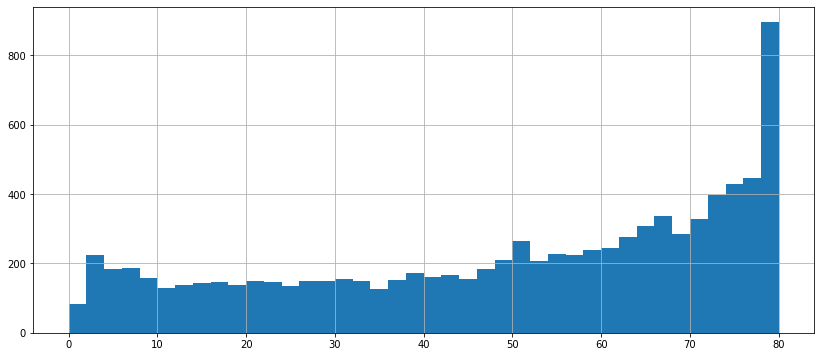

In [54]:
# --->Histogram check
bin_values = np.arange(start = 0, stop = 82, step = 2) # (82 nba regular season game per team), 1 bar per 2 games
df_cleaned['gp'].hist(bins=bin_values, figsize=[14, 6])

In [55]:
#on histogram, significant number of players increase from 10 games --> 10 games a season per player (or less) = outliers
min_gp = 10

#filter out players who played 10 games or less (oultliers)
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

#how many outliers dropped?
df_cleaned['player_id'].count() - df_filter['player_id'].count()

902

In [56]:
# Normalize since accross decades gameplays and rules have been changing considerably

# --> function factoring in the season stats, max & min values --> normalize

season = (df_filter['season_id'] == current_player_season)

df_2018 = df_filter[season]
df_2018

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9563,201166,2017-18,32.0,33.0,5.9,0.9,2.2,0.406,0.3,1.0,...,0.3,0.3,0.727,0.2,0.3,0.6,0.3,0.2,0.0,2.3
9564,203932,2017-18,58.0,22.0,32.9,6.5,14.9,0.434,2.0,5.9,...,2.7,3.9,0.698,1.5,6.4,2.3,1.8,1.0,0.8,17.6
9567,1627846,2017-18,48.0,24.0,10.9,1.0,3.1,0.336,0.5,1.4,...,0.5,0.8,0.590,0.3,1.2,0.5,0.7,0.3,0.2,3.0
9569,201143,2017-18,72.0,32.0,31.6,5.1,10.5,0.489,1.3,3.1,...,1.3,1.7,0.783,1.4,5.9,4.7,1.8,0.6,1.1,12.9
9570,2744,2017-18,36.0,33.0,13.4,3.1,5.8,0.534,0.0,0.1,...,0.8,1.0,0.833,0.8,3.1,0.8,0.6,0.4,0.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.4,0.6,0.643,0.7,2.7,0.8,0.9,0.3,0.5,4.4
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,3.6,4.5,0.813,0.4,3.5,3.0,1.8,1.0,0.2,16.7
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,1.4,1.8,0.785,1.6,5.1,2.2,2.0,0.7,0.2,14.5
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,1.1,1.3,0.806,1.3,3.4,1.6,1.0,0.6,0.2,5.4


In [57]:
# to normalize --> (value  - min)/(max - min)

df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

# sort most points to least, top 10
df_2018.sort_values('pts_norm', ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [58]:
stats = ['pts',  #points
    'min',   #minutes
    'fgm',   #field goals made
    'fga',   #field goals attempted
    'fg3m',  #3pt field goals made
    'fg3a',  #3pt field goals attempted
    'ftm',   #free throws made
    'fta',   #free throws attempted
    'oreb',  #offensive rebounds
    'dreb',  #defensive rebounds
    'ast',   #assists
    'stl',   #steals
    'tov',   #turnovers
    'blk',]  #blocks


def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

cols_to_norm = stats

# --> for loop taking dataframe as input and return updated dataframe with normalized columns
def vorp(df): # vorp = value of replacement
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name]) #add '_norm' to column name
    return df

df_2018_norm = vorp(df_2018)

df_2018_norm.sample(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
10065,1627786,2017-18,21.0,23.0,14.6,2.4,5.2,0.468,0.5,1.8,...,0.119048,0.18,0.114943,0.138614,0.196078,0.168224,0.077670,0.416667,0.18,0.076923
9764,201580,2017-18,65.0,30.0,9.5,2.1,3.4,0.621,0.0,0.1,...,0.000000,0.01,0.068966,0.079208,0.176471,0.140187,0.048544,0.125000,0.08,0.346154
10051,2754,2017-18,22.0,36.0,12.4,2.0,4.1,0.484,0.2,0.5,...,0.047619,0.05,0.057471,0.099010,0.176471,0.093458,0.038835,0.208333,0.18,0.038462
9930,203090,2017-18,59.0,25.0,21.4,2.5,5.0,0.495,0.8,2.0,...,0.190476,0.20,0.080460,0.099010,0.156863,0.168224,0.087379,0.333333,0.14,0.269231
9605,201933,2017-18,58.0,29.0,34.0,7.5,17.2,0.438,1.9,5.6,...,0.452381,0.56,0.517241,0.564356,0.254902,0.551402,0.563107,0.291667,0.56,0.115385
9700,1627827,2017-18,21.0,25.0,21.3,2.2,5.8,0.380,1.0,3.2,...,0.238095,0.32,0.057471,0.069307,0.196078,0.214953,0.116505,0.208333,0.20,0.076923
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,0.880952,1.00,1.000000,1.000000,0.117647,0.429907,0.854369,0.750000,0.88,0.269231
9651,2863,2017-18,19.0,38.0,8.0,0.7,2.1,0.333,0.2,0.9,...,0.047619,0.09,0.022989,0.019802,0.058824,0.037383,0.048544,0.041667,0.06,0.038462
9776,1627750,2017-18,81.0,21.0,31.7,5.9,13.1,0.451,2.0,5.4,...,0.476190,0.54,0.321839,0.306931,0.196078,0.233645,0.330097,0.416667,0.42,0.115385
9893,201601,2017-18,61.0,31.0,25.6,2.7,5.7,0.481,1.0,2.8,...,0.238095,0.28,0.126437,0.158416,0.078431,0.233645,0.087379,0.500000,0.22,0.153846


In [59]:
# group by season id
grouped = df_filter.groupby('season_id')

#check if okay
grouped['pts'].mean()

season_id
1996-97    8.636683
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
Name: pts, dtype: float64

In [60]:
df_final = df_filter.groupby(['season_id']).apply(vorp)
df_final.tail()

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.119048,0.17,0.045977,0.059406,0.137255,0.233645,0.077670,0.125000,0.18,0.192308
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,0.428571,0.51,0.413793,0.445545,0.078431,0.308411,0.291262,0.416667,0.36,0.076923
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,0.214286,0.25,0.160920,0.178218,0.313725,0.457944,0.213592,0.291667,0.40,0.076923
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10102,1627753,2017-18,18.0,22.0,6.9,0.3,1.8,0.188,0.1,1.1,...,0.023810,0.11,0.045977,0.069307,0.058824,0.065421,0.009709,0.041667,0.12,0.307692


In [61]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

# Player distance function needed: how close 2 players are or any given stats
# top 10 players with shortest distance (= most similar seasons)
# simplified result with just one number

def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2)) #Euclidean distance
    return dist

def find_player(df, player_id, season):
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row
        
        
# 3 inputs taken: df, current player season, current player id --> projected stats --> df
        
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False): #if any of those = false
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item() 
    ]) 
    
    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: `item` has

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [62]:
print(final_projections)

# Something's wrong, final_projections should display projected stats of the next season of the 10 players
# --> turn final_projections into dataframe --> csv file 'proj_df.csv'

[]


### RMSE (root mean squared error) to evaluate model

In [63]:
proj_df = pd.read_csv('player_proj_df.csv')

round(proj_df.head(), 1)

,player_id,proj_ast,proj_blk,proj_dreb,proj_fg3a,proj_fg3m,proj_fga,proj_fgm,proj_fta,proj_ftm,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,203932,2.0,0.7,5.1,4.0,1.4,13.5,6.0,3.6,2.8,...,2.4,3.2,0.7,1.7,5.7,3.7,2.1,0.7,0.7,16.0
1,201143,3.2,1.0,4.6,3.1,1.1,10.4,4.9,1.9,1.5,...,1.1,1.4,0.8,1.8,5.0,4.2,1.5,0.9,1.3,13.6
2,202329,1.8,0.4,4.3,3.9,1.4,8.2,3.6,1.7,1.2,...,1.9,2.1,0.9,1.4,6.1,1.3,0.9,0.8,0.4,9.4
3,202692,1.5,0.1,1.9,2.2,0.7,7.3,3.0,2.2,1.7,...,1.8,2.2,0.8,0.5,3.2,2.0,1.0,0.6,0.3,8.8
4,203518,1.0,0.1,1.4,2.8,1.1,4.6,1.9,0.8,0.7,...,0.4,0.4,0.9,0.2,1.4,0.6,0.5,0.5,0.2,5.3


In [64]:
proj_df['squared_error'] = (proj_df['proj_pts'] - proj_df['pts'])**(2)

mse = proj_df['squared_error'].mean()

rmse = mse ** (1/2)
rmse

3.3029710889169848

In [65]:
proj_df['squared_error'] = (proj_df['proj_ast'] - proj_df['ast'])**(2)

mse = proj_df['squared_error'].mean()

rmse = mse ** (1/2)
rmse

0.9944342105776938

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
player_proj = pd.read_csv('player_proj_df.csv')
player_info = pd.read_csv('player_info_df.csv')

In [68]:
df_real = player_proj.loc[:, ['pts',
                              'min',
                              'fgm',
                              'fga',
                              'fg3m',
                              'fg3a',
                              'ftm',
                              'fta',
                              'oreb',
                              'dreb',
                              'ast',
                              'stl',
                              'tov',
                              'blk']]

display(df_real.head())

df_proj = player_proj.loc[:, ['proj_pts',
                              'proj_min',
                              'proj_fgm',
                              'proj_fga',
                              'proj_fg3m',
                              'proj_fg3a',
                              'proj_ftm',
                              'proj_fta',
                              'proj_oreb',
                              'proj_dreb',
                              'proj_ast',
                              'proj_stl',
                              'proj_tov',
                              'proj_blk']]


display(round(df_proj.head(), 1))

,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
0,16.0,33.8,6.0,13.4,1.6,4.4,2.4,3.2,1.7,5.7,3.7,0.7,2.1,0.7
1,13.6,29.0,5.7,10.6,1.1,3.0,1.1,1.4,1.8,5.0,4.2,0.9,1.5,1.3
2,9.4,28.3,3.2,7.3,1.2,3.5,1.9,2.1,1.4,6.1,1.3,0.8,0.9,0.4
3,8.8,21.5,3.0,7.4,1.0,2.6,1.8,2.2,0.5,3.2,2.0,0.6,1.0,0.3
4,5.3,19.0,1.8,5.1,1.3,4.1,0.4,0.4,0.2,1.4,0.6,0.5,0.5,0.2


,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
0,16.1,33.9,6.0,13.5,1.4,4.0,2.8,3.6,1.6,5.1,2.0,0.9,1.6,0.7
1,12.3,30.2,4.9,10.4,1.1,3.1,1.5,1.9,1.2,4.6,3.2,0.7,1.6,1.0
2,9.8,28.0,3.6,8.2,1.4,3.9,1.2,1.7,1.1,4.3,1.8,0.9,1.1,0.4
3,8.3,20.8,3.0,7.3,0.7,2.2,1.7,2.2,0.5,1.9,1.5,0.5,1.0,0.1
4,5.5,17.0,1.9,4.6,1.1,2.8,0.7,0.8,0.4,1.4,1.0,0.5,0.6,0.1


In [69]:
se = mean_squared_error(df_real, df_proj)

mse = np.mean(se)

rmse = np.sqrt(mse)

confidence = rmse

print('{0} percent confidence in projected {1} per game stats'.format(100 - round(confidence, 2), '2018-19'))

98.03 percent confidence in projected 2018-19 per game stats


In [70]:
# concacenate the real and projected df with player_info df to see names and numbers

df_real_stats = pd.concat([player_info, df_real], axis = 1)

# rename season_id column
df_real_stats.rename(columns = 
                    {'proj_season_id' : 'season_id'}, inplace = True)


df_real_stats.head()

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
0,Aaron Gordon,203932,2018-19,16.0,33.8,6.0,13.4,1.6,4.4,2.4,3.2,1.7,5.7,3.7,0.7,2.1,0.7
1,Al Horford,201143,2018-19,13.6,29.0,5.7,10.6,1.1,3.0,1.1,1.4,1.8,5.0,4.2,0.9,1.5,1.3
2,Al-Farouq Aminu,202329,2018-19,9.4,28.3,3.2,7.3,1.2,3.5,1.9,2.1,1.4,6.1,1.3,0.8,0.9,0.4
3,Alec Burks,202692,2018-19,8.8,21.5,3.0,7.4,1.0,2.6,1.8,2.2,0.5,3.2,2.0,0.6,1.0,0.3
4,Alex Abrines,203518,2018-19,5.3,19.0,1.8,5.1,1.3,4.1,0.4,0.4,0.2,1.4,0.6,0.5,0.5,0.2


In [71]:
df_proj_stats = pd.concat([player_info, df_proj], axis=1)

df_proj_stats.rename(columns = {'proj_season_id':'season_id',
                                'proj_pts':'pts',
                                'proj_min':'min',
                                'proj_fgm':'fgm',
                                'proj_fga':'fga',
                                'proj_fg3m':'fg3m',
                                'proj_fg3a':'fg3a',
                                'proj_ftm':'ftm',
                                'proj_fta':'fta',
                                'proj_oreb':'oreb',
                                'proj_dreb':'dreb',
                                'proj_ast':'ast',
                                'proj_stl':'stl',
                                'proj_tov':'tov',
                                'proj_blk':'blk'}, inplace = True)

round(df_proj_stats, 1).head()

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
0,Aaron Gordon,203932,2018-19,16.1,33.9,6.0,13.5,1.4,4.0,2.8,3.6,1.6,5.1,2.0,0.9,1.6,0.7
1,Al Horford,201143,2018-19,12.3,30.2,4.9,10.4,1.1,3.1,1.5,1.9,1.2,4.6,3.2,0.7,1.6,1.0
2,Al-Farouq Aminu,202329,2018-19,9.8,28.0,3.6,8.2,1.4,3.9,1.2,1.7,1.1,4.3,1.8,0.9,1.1,0.4
3,Alec Burks,202692,2018-19,8.3,20.8,3.0,7.3,0.7,2.2,1.7,2.2,0.5,1.9,1.5,0.5,1.0,0.1
4,Alex Abrines,203518,2018-19,5.5,17.0,1.9,4.6,1.1,2.8,0.7,0.8,0.4,1.4,1.0,0.5,0.6,0.1


### Comparing Competitors

In [72]:
player_proj = pd.read_csv('player_proj_df.csv')

# Create new Dataframe containing only projections columns

df_proj_final = player_proj.loc[:, ['player_name',
                                    'player_id',
                                    'proj_pts',
                                    'proj_min', 
                                    'proj_fgm',
                                    'proj_fga',
                                    'proj_fg3m',
                                    'proj_fg3a',
                                    'proj_ftm',
                                    'proj_fta', 
                                    'proj_oreb', 
                                    'proj_dreb', 
                                    'proj_ast', 
                                    'proj_stl', 
                                    'proj_tov',
                                    'proj_blk']]

# FG %, FG3% and FT % never calculated since we had rows fgm, fga, fg3m, fg3a, ftm, fta 
# --> new columns for each (divide made by total attempts)

df_proj_final['proj_fg%'] = (df_proj_final['proj_fgm'] / df_proj_final['proj_fga']) * 100
df_proj_final['proj_ft%'] = (df_proj_final['proj_ftm'] / df_proj_final['proj_fta']) * 100
df_proj_final['proj_fg3%'] = (df_proj_final['proj_fg3m'] / df_proj_final['proj_fg3a']) * 100

# offensive and defensive rebounds split --> put them together to get total

df_proj_final['proj_reb'] = df_proj_final['proj_oreb'] + df_proj_final['proj_dreb']


df_proj_final = df_proj_final.loc[:, ['player_name',
                                      'player_id',
                                      'proj_pts',
                                      'proj_min', 
                                      'proj_fg%',
                                      'proj_fg3%',
                                      'proj_ft%',
                                      'proj_reb', 
                                      'proj_ast', 
                                      'proj_stl', 
                                      'proj_tov',
                                      'proj_blk']]

display(round(df_proj_final, 1).head())

# competitor data
df_competitor = pd.read_csv('ESPN_CBS_FantasyPros_Fantasy_Basketball_Overall_2018_Average_Projections.csv')
display(df_competitor.head())

,player_name,player_id,proj_pts,proj_min,proj_fg%,proj_fg3%,proj_ft%,proj_reb,proj_ast,proj_stl,proj_tov,proj_blk
0,Aaron Gordon,203932,16.1,33.9,44.1,35.4,77.6,6.7,2.0,0.9,1.6,0.7
1,Al Horford,201143,12.3,30.2,46.9,36.6,76.3,5.8,3.2,0.7,1.6,1.0
2,Al-Farouq Aminu,202329,9.8,28.0,43.6,36.3,73.7,5.4,1.8,0.9,1.1,0.4
3,Alec Burks,202692,8.3,20.8,41.4,31.6,77.0,2.4,1.5,0.5,1.0,0.1
4,Alex Abrines,203518,5.5,17.0,40.9,38.0,79.6,1.7,1.0,0.5,0.6,0.1


,Player,Team,Positions,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,GP,MIN,TO
0,Anthony Davis,NOR,"PF,C",29.6,11.6,2.3,2.5,1.7,0.530,0.814,0.7,78.0,37.6,2.3
1,James Harden,HOU,"PG,SG",28.7,6.5,7.7,0.6,1.7,0.440,0.856,3.3,80.0,35.6,4.8
2,LeBron James,LAL,"SF,PF",27.8,8.5,7.4,0.8,1.4,0.557,0.728,1.7,79.0,34.6,4.3
3,Giannis Antetokounmpo,MIL,"SF,PF",27.7,10.2,5.6,1.6,1.6,0.544,0.763,0.6,80.0,37.5,2.9
4,Russell Westbrook,OKC,PG,27.0,10.2,9.8,0.3,1.7,0.443,0.788,1.6,75.0,34.5,4.9


In [73]:
# drop columns
df_competitor = df_competitor.drop(['Team', 'Positions', 'GP'], axis = 1)

# ---> player names --> lowercase
df_competitor['Player'] = df_competitor['Player'].str.lower()

df_competitor.head()

,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO
0,anthony davis,29.6,11.6,2.3,2.5,1.7,0.530,0.814,0.7,37.6,2.3
1,james harden,28.7,6.5,7.7,0.6,1.7,0.440,0.856,3.3,35.6,4.8
2,lebron james,27.8,8.5,7.4,0.8,1.4,0.557,0.728,1.7,34.6,4.3
3,giannis antetokounmpo,27.7,10.2,5.6,1.6,1.6,0.544,0.763,0.6,37.5,2.9
4,russell westbrook,27.0,10.2,9.8,0.3,1.7,0.443,0.788,1.6,34.5,4.9


In [74]:
player_info = pd.read_csv('player_info_df.csv')
season = player_info['proj_season_id'] == '2018-19'

player_df = player_info[season]
player_df['player_name'] = player_df['player_name'].str.lower()
display(player_df.head())

# Merge --> drop duplicates --> reset index to a new one

comp_merge = pd.merge(df_competitor,
                        player_df[['player_name', 'player_id']],
                        how = 'left',
                        left_on = 'Player',
                        right_on = 'player_name').drop_duplicates().reset_index(drop = True)

#drop any rows with na
comp_merge.dropna(how = 'any', inplace = True)

display(comp_merge.sample(10))

,player_name,player_id,proj_season_id
0,aaron gordon,203932,2018-19
1,al horford,201143,2018-19
2,al-farouq aminu,202329,2018-19
3,alec burks,202692,2018-19
4,alex abrines,203518,2018-19


,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO,player_name,player_id
73,dario saric,14.5,6.8,2.5,0.3,0.7,0.441,0.835,1.9,29.7,2.0,dario saric,203967.0
295,anthony tolliver,5.3,2.3,0.7,0.2,0.4,0.448,0.774,1.1,18.9,0.5,anthony tolliver,201229.0
336,jose calderon,3.8,1.7,1.8,0.0,0.4,0.467,0.844,0.6,0.0,0.7,jose calderon,101181.0
191,skal labissiere,8.4,4.6,1.1,0.6,0.5,0.482,0.774,0.4,19.8,1.1,skal labissiere,1627746.0
275,justin anderson,5.9,2.7,0.7,0.2,0.4,0.429,0.778,0.6,0.0,0.9,justin anderson,1626147.0
62,eric gordon,15.5,2.5,2.1,0.4,0.6,0.416,0.822,2.9,29.1,1.6,eric gordon,201569.0
93,al horford,13.3,7.5,4.5,1.2,0.7,0.496,0.794,1.3,31.9,1.7,al horford,201143.0
285,tony parker,5.7,1.0,2.2,0.0,0.3,0.445,0.724,0.3,18.1,0.8,tony parker,2225.0
279,cory joseph,5.7,2.2,2.1,0.1,0.7,0.438,0.764,0.5,21.3,0.9,cory joseph,202709.0
104,rondae hollis-jefferson,12.6,7.1,2.5,0.8,1.0,0.463,0.774,0.2,30.4,1.8,rondae hollis-jefferson,1626178.0


In [75]:
# player id with decimal?? Strange isn't it
comp_merge.dtypes

Player          object
PTS            float64
REB            float64
AST            float64
BLK            float64
STL            float64
FG%            float64
FT%            float64
3PM            float64
MIN            float64
TO             float64
player_name     object
player_id      float64
dtype: object

In [76]:
# Oh that's because it's considered as float --> let's convert it into integer

comp_merge['player_id'] = comp_merge['player_id'].astype(int)
comp_merge.head(10)

,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO,player_name,player_id
0,anthony davis,29.6,11.6,2.3,2.5,1.7,0.530,0.814,0.7,37.6,2.3,anthony davis,203076
1,james harden,28.7,6.5,7.7,0.6,1.7,0.440,0.856,3.3,35.6,4.8,james harden,201935
2,lebron james,27.8,8.5,7.4,0.8,1.4,0.557,0.728,1.7,34.6,4.3,lebron james,2544
3,giannis antetokounmpo,27.7,10.2,5.6,1.6,1.6,0.544,0.763,0.6,37.5,2.9,giannis antetokounmpo,203507
4,russell westbrook,27.0,10.2,9.8,0.3,1.7,0.443,0.788,1.6,34.5,4.9,russell westbrook,201566
6,damian lillard,26.0,4.9,6.0,0.3,1.0,0.437,0.908,2.9,37.2,2.7,damian lillard,203081
7,kevin durant,25.6,7.4,4.8,1.6,0.9,0.520,0.886,2.3,34.2,2.8,kevin durant,201142
8,stephen curry,25.5,4.9,5.9,0.2,1.7,0.482,0.911,4.2,32.9,3.1,stephen curry,201939
9,devin booker,24.7,3.8,5.4,0.3,0.9,0.434,0.856,2.8,35.2,3.4,devin booker,1626164
11,joel embiid,23.7,11.1,3.1,1.8,0.7,0.482,0.775,1.2,33.3,3.8,joel embiid,203954


In [77]:
del comp_merge['Player']

In [78]:
cols = ['player_name','player_id', 'PTS', 'REB', 'AST', 'BLK', 'STL', 'FG%', 'FT%', '3PM', 'MIN', 'TO']
comp_merge = comp_merge[cols]

comp_merge['FG%'] = round(comp_merge['FG%'] * 100, 1)
comp_merge['FT%'] = round(comp_merge['FT%'] * 100, 1)

comp_merge.head(10)

,player_name,player_id,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO
0,anthony davis,203076,29.6,11.6,2.3,2.5,1.7,53.0,81.4,0.7,37.6,2.3
1,james harden,201935,28.7,6.5,7.7,0.6,1.7,44.0,85.6,3.3,35.6,4.8
2,lebron james,2544,27.8,8.5,7.4,0.8,1.4,55.7,72.8,1.7,34.6,4.3
3,giannis antetokounmpo,203507,27.7,10.2,5.6,1.6,1.6,54.4,76.3,0.6,37.5,2.9
4,russell westbrook,201566,27.0,10.2,9.8,0.3,1.7,44.3,78.8,1.6,34.5,4.9
6,damian lillard,203081,26.0,4.9,6.0,0.3,1.0,43.7,90.8,2.9,37.2,2.7
7,kevin durant,201142,25.6,7.4,4.8,1.6,0.9,52.0,88.6,2.3,34.2,2.8
8,stephen curry,201939,25.5,4.9,5.9,0.2,1.7,48.2,91.1,4.2,32.9,3.1
9,devin booker,1626164,24.7,3.8,5.4,0.3,0.9,43.4,85.6,2.8,35.2,3.4
11,joel embiid,203954,23.7,11.1,3.1,1.8,0.7,48.2,77.5,1.2,33.3,3.8


In [79]:
# --> get real data from player projected df by calling columns without projection before
# also player name + id

df_real = player_proj.loc[:, ['player_name',
                              'player_id',
                              'pts',
                              'min',
                              'fgm',
                              'fga',
                              'fg3m',
                              'fg3a',
                              'ftm',
                              'fta',
                              'oreb',
                              'dreb',
                              'ast',
                              'stl',
                              'tov',
                              'blk']]

# FG %, FG3% and FT % never calculated since we had rows fgm, fga, fg3m, fg3a, ftm, fta 
# --> new columns for each (divide made by total attempts)

df_real['fg%'] = (df_real['fgm'] / df_real['fga']) * 100
df_real['ft%'] = (df_real['ftm'] / df_real['fta']) * 100
df_real['fg3%'] = (df_real['fg3m'] / df_real['fg3a']) * 100

# offensive and defensive rebounds split --> put them together to get total

df_real['reb'] = df_real['oreb'] + df_real['dreb']


df_real_final = df_real.loc[:, ['player_name',
                          'player_id',
                          'pts',
                          'min', 
                          'fg%',
                          'fg3%',
                          'ft%',
                          'reb', 
                          'ast', 
                          'stl', 
                          'tov',
                          'blk']]

display(round(df_real_final, 1).head())

# Merge --> drop duplicates --> reset index to a new one

competitor_final = pd.merge(comp_merge, df_real_final, how = 'left', on = 'player_id')

#drop any rows with na
competitor_final.dropna(how = 'any', inplace = True)


display(round(competitor_final, 1).head(10))

# all accross one row, projections vs. real stats

# --> New Df

df_real = competitor_final.loc[:, ['pts', 'reb', 'ast', 'blk', 'stl', 'fg%', 'ft%', 'fg3%', 'min', 'tov']]
df_proj = competitor_final.loc[:, ['PTS', 'REB', 'AST', 'BLK', 'STL', 'FG%', 'FT%', '3PM', 'MIN', 'TO']]

lin_mse = mean_squared_error(df_real, df_proj)

lin_rmse = np.mean(lin_mse)

confidence = np.sqrt(lin_rmse)

print('{0} percent confidence in projected {1} per game stats'.format(100 - round(confidence, 2), '2018-19'))

,player_name,player_id,pts,min,fg%,fg3%,ft%,reb,ast,stl,tov,blk
0,Aaron Gordon,203932,16.0,33.8,44.8,36.4,75.0,7.4,3.7,0.7,2.1,0.7
1,Al Horford,201143,13.6,29.0,53.8,36.7,78.6,6.8,4.2,0.9,1.5,1.3
2,Al-Farouq Aminu,202329,9.4,28.3,43.8,34.3,90.5,7.5,1.3,0.8,0.9,0.4
3,Alec Burks,202692,8.8,21.5,40.5,38.5,81.8,3.7,2.0,0.6,1.0,0.3
4,Alex Abrines,203518,5.3,19.0,35.3,31.7,100.0,1.6,0.6,0.5,0.5,0.2


,player_name_x,player_id,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,...,pts,min,fg%,fg3%,ft%,reb,ast,stl,tov,blk
0,anthony davis,203076,29.6,11.6,2.3,2.5,1.7,53.0,81.4,0.7,...,25.9,33.0,51.9,34.6,79.2,12.0,3.9,1.6,2.0,2.4
1,james harden,201935,28.7,6.5,7.7,0.6,1.7,44.0,85.6,3.3,...,36.1,36.8,44.1,36.4,88.2,6.6,7.5,2.0,5.0,0.7
2,lebron james,2544,27.8,8.5,7.4,0.8,1.4,55.7,72.8,1.7,...,27.4,35.2,50.8,33.9,67.1,8.4,8.3,1.3,3.6,0.6
3,giannis antetokounmpo,203507,27.7,10.2,5.6,1.6,1.6,54.4,76.3,0.6,...,27.7,32.8,57.8,25.0,72.6,12.5,5.9,1.3,3.7,1.5
4,russell westbrook,201566,27.0,10.2,9.8,0.3,1.7,44.3,78.8,1.6,...,22.9,36.0,42.6,28.6,66.1,11.1,10.7,1.9,4.5,0.5
5,damian lillard,203081,26.0,4.9,6.0,0.3,1.0,43.7,90.8,2.9,...,25.8,35.5,44.3,37.5,92.2,4.7,6.9,1.1,2.7,0.4
6,kevin durant,201142,25.6,7.4,4.8,1.6,0.9,52.0,88.6,2.3,...,26.0,34.6,52.0,36.0,87.7,6.3,5.9,0.7,2.9,1.1
7,stephen curry,201939,25.5,4.9,5.9,0.2,1.7,48.2,91.1,4.2,...,27.3,33.8,47.4,43.6,90.5,5.4,5.2,1.3,2.8,0.4
8,devin booker,1626164,24.7,3.8,5.4,0.3,0.9,43.4,85.6,2.8,...,26.6,35.0,46.9,32.3,85.9,4.1,6.8,0.9,4.1,0.2
9,joel embiid,203954,23.7,11.1,3.1,1.8,0.7,48.2,77.5,1.2,...,27.5,33.7,48.7,29.3,81.2,13.6,3.7,0.7,3.5,1.9


88.77 percent confidence in projected 2018-19 per game stats


In [80]:
display(round(df_proj_final, 1).head())
display(round(df_real_final, 1).head())

,player_name,player_id,proj_pts,proj_min,proj_fg%,proj_fg3%,proj_ft%,proj_reb,proj_ast,proj_stl,proj_tov,proj_blk
0,Aaron Gordon,203932,16.1,33.9,44.1,35.4,77.6,6.7,2.0,0.9,1.6,0.7
1,Al Horford,201143,12.3,30.2,46.9,36.6,76.3,5.8,3.2,0.7,1.6,1.0
2,Al-Farouq Aminu,202329,9.8,28.0,43.6,36.3,73.7,5.4,1.8,0.9,1.1,0.4
3,Alec Burks,202692,8.3,20.8,41.4,31.6,77.0,2.4,1.5,0.5,1.0,0.1
4,Alex Abrines,203518,5.5,17.0,40.9,38.0,79.6,1.7,1.0,0.5,0.6,0.1


,player_name,player_id,pts,min,fg%,fg3%,ft%,reb,ast,stl,tov,blk
0,Aaron Gordon,203932,16.0,33.8,44.8,36.4,75.0,7.4,3.7,0.7,2.1,0.7
1,Al Horford,201143,13.6,29.0,53.8,36.7,78.6,6.8,4.2,0.9,1.5,1.3
2,Al-Farouq Aminu,202329,9.4,28.3,43.8,34.3,90.5,7.5,1.3,0.8,0.9,0.4
3,Alec Burks,202692,8.8,21.5,40.5,38.5,81.8,3.7,2.0,0.6,1.0,0.3
4,Alex Abrines,203518,5.3,19.0,35.3,31.7,100.0,1.6,0.6,0.5,0.5,0.2


In [81]:
model_final = pd.merge(df_proj_final, df_real_final, how = 'left', on = 'player_id')
display(model_final.head())

df_real = model_final.loc[:, ['pts', 'reb', 'ast', 'blk', 'stl', 'fg%', 'ft%', 'fg3%', 'min', 'tov']]
df_proj = model_final.loc[:, ['proj_pts', 'proj_reb', 'proj_ast', 'proj_blk', 'proj_stl', 'proj_fg%', 'proj_ft%', 'proj_fg3%', 'proj_min', 'proj_tov']]

df_real.fillna(0, inplace = True)
df_proj.fillna(0, inplace = True)

lin_mse = mean_squared_error(df_real, df_proj)

lin_rmse = np.mean(lin_mse)

confidence = np.sqrt(lin_rmse)

print('{0} percent confidence in projected {1} per game stats'.format(100 - round(confidence, 2), '2018-19'))

,player_name_x,player_id,proj_pts,proj_min,proj_fg%,proj_fg3%,proj_ft%,proj_reb,proj_ast,proj_stl,...,pts,min,fg%,fg3%,ft%,reb,ast,stl,tov,blk
0,Aaron Gordon,203932,16.063873,33.942109,44.093369,35.400323,77.602552,6.748596,1.994430,0.909579,...,16.0,33.8,44.776119,36.363636,75.000000,7.4,3.7,0.7,2.1,0.7
1,Al Horford,201143,12.340232,30.246673,46.924037,36.605196,76.321257,5.801251,3.247733,0.652499,...,13.6,29.0,53.773585,36.666667,78.571429,6.8,4.2,0.9,1.5,1.3
2,Al-Farouq Aminu,202329,9.784116,27.978945,43.641997,36.303915,73.719108,5.388717,1.754433,0.946406,...,9.4,28.3,43.835616,34.285714,90.476190,7.5,1.3,0.8,0.9,0.4
3,Alec Burks,202692,8.349126,20.803754,41.373174,31.605995,76.963541,2.417396,1.525246,0.541122,...,8.8,21.5,40.540541,38.461538,81.818182,3.7,2.0,0.6,1.0,0.3
4,Alex Abrines,203518,5.502404,16.998044,40.861243,38.028592,79.644958,1.731801,0.988705,0.481071,...,5.3,19.0,35.294118,31.707317,100.000000,1.6,0.6,0.5,0.5,0.2


93.59 percent confidence in projected 2018-19 per game stats


## Converting to fantasy points

In [82]:
player_proj = pd.read_csv('player_proj_df.csv')
player_info = pd.read_csv('player_info_df.csv')



df_proj_stats = pd.concat([player_info, player_proj.loc[:, ['proj_pts',
                                                            'proj_min',
                                                            'proj_fgm',
                                                            'proj_fga',
                                                            'proj_fg3m',
                                                            'proj_fg3a',
                                                            'proj_ftm',
                                                            'proj_fta',
                                                            'proj_oreb',
                                                            'proj_dreb',
                                                            'proj_ast',
                                                            'proj_stl',
                                                            'proj_tov',
                                                            'proj_blk']]], axis = 1)

df_proj_stats.rename(columns = {'proj_season_id':'season_id',
                                'proj_pts':'pts',
                                'proj_min':'min',
                                'proj_fgm':'fgm',
                                'proj_fga':'fga',
                                'proj_fg3m':'fg3m',
                                'proj_fg3a':'fg3a',
                                'proj_ftm':'ftm',
                                'proj_fta':'fta',
                                'proj_oreb':'oreb',
                                'proj_dreb':'dreb',
                                'proj_ast':'ast',
                                'proj_stl':'stl',
                                'proj_tov':'tov',
                                'proj_blk':'blk'}, inplace = True)

round(df_proj_stats, 1).sample(10)

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
29,Bryn Forbes,1627854,2018-19,6.4,18.1,2.4,5.6,0.9,2.3,0.8,1.0,0.4,1.7,1.0,0.4,0.7,0.1
279,Tobias Harris,202699,2018-19,14.4,30.0,5.4,12.2,1.7,4.3,2.0,2.6,0.7,3.4,2.5,0.8,1.4,0.3
55,Dario Saric,203967,2018-19,13.4,31.4,5.0,11.2,1.2,3.3,2.1,2.6,1.1,4.0,2.2,0.7,1.5,0.4
300,Wesley Johnson,202325,2018-19,6.2,20.2,2.4,5.9,0.7,2.1,0.7,1.0,0.7,2.4,1.5,0.8,0.9,0.4
74,Dion Waiters,203079,2018-19,13.5,29.5,4.9,11.8,1.7,4.7,1.9,2.4,0.4,2.2,3.0,0.9,1.7,0.2
187,Luc Mbah a Moute,201601,2018-19,6.6,22.8,2.4,5.7,0.9,2.5,0.8,1.3,0.6,2.5,1.7,0.8,0.9,0.3
84,E'Twaun Moore,202734,2018-19,12.2,28.6,4.4,9.7,1.4,3.6,1.9,2.4,0.5,2.2,2.8,1.1,1.2,0.2
261,Skal Labissiere,1627746,2018-19,8.2,19.6,3.3,7.3,0.4,1.1,1.4,1.9,1.3,3.5,0.8,0.4,1.0,0.7
11,Andrew Bogut,101106,2018-19,2.2,13.3,0.9,2.1,0.0,0.0,0.4,0.8,1.1,2.4,0.7,0.2,0.8,1.0
30,Buddy Hield,1627741,2018-19,12.3,30.4,4.5,10.8,1.6,4.4,1.6,2.0,0.7,2.8,2.2,1.2,1.4,0.3


In [83]:
# create function taking rows as inputs and output in new values called fantasy points
# (ESPN fantasy league)

def fantasy_pts_converter(row):
    pts = row['pts']
    fgm = row['fgm']
    fga = row['fga']
    ftm = row['ftm']
    fta = row['fta']
    oreb = row['oreb']
    dreb = row['dreb']
    ast = row['ast']
    stl = row['stl']
    tov = row['tov']
    blk = row['blk']
    fantasy_pts = (pts + fgm + ftm + oreb + dreb + ast + stl + blk) - (fga + fta + tov)
    return fantasy_pts

df_proj_stats['fantasy_pts'] = df_proj_stats.apply(fantasy_pts_converter, axis = 1)

df_proj_stats = df_proj_stats.sort_values('fantasy_pts', ascending = False)

round(df_proj_stats, 1).head(10)

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk,fantasy_pts
185,LeBron James,2544,2018-19,27.0,37.5,9.9,19.0,1.5,4.3,5.6,7.6,1.1,6.4,7.0,1.5,3.5,0.8,29.2
253,Russell Westbrook,201566,2018-19,26.5,36.8,9.5,19.4,1.6,4.6,5.9,7.7,1.1,6.2,8.1,1.6,3.8,0.5,28.4
101,Giannis Antetokounmpo,203507,2018-19,25.9,36.7,9.6,19.3,0.7,2.0,6.0,7.8,2.2,7.7,4.2,1.4,2.9,1.5,28.4
14,Anthony Davis,203076,2018-19,25.0,35.3,9.4,18.0,0.4,1.4,5.7,7.4,2.3,7.8,2.3,1.2,2.2,1.9,28.0
129,James Harden,201935,2018-19,27.4,37.3,8.7,19.3,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,26.5
62,DeMarcus Cousins,202326,2018-19,26.5,38.3,9.1,19.6,1.7,5.0,6.5,8.5,1.3,6.5,5.7,1.6,3.5,0.8,26.4
168,Kevin Durant,201142,2018-19,25.9,36.3,9.0,19.1,2.2,5.9,5.8,6.7,0.8,5.6,5.3,1.1,2.8,0.9,25.7
145,Joel Embiid,203954,2018-19,21.8,35.8,7.9,16.3,0.4,1.2,5.7,7.2,2.2,7.1,2.7,0.8,2.5,1.5,23.6
265,Stephen Curry,201939,2018-19,24.2,36.9,8.2,18.1,3.0,7.3,4.8,5.5,0.9,3.7,5.6,1.4,2.9,0.3,22.6
161,Karl-Anthony Towns,1626157,2018-19,19.4,35.5,7.4,15.5,1.1,3.0,3.4,4.5,2.1,7.1,2.8,1.0,2.0,1.1,22.3


In [84]:
df_for_export = round(df_proj_stats, 2)
df_for_export.to_csv('projected_fantasy_pts_final_2018_19b.csv', index = False)

## Value Based Drafting

### Getting baseline numbers

In [85]:
draft_df = pd.read_csv('Fantasy Projections - 2018_19 - 2018_espn_draft.csv')

df_top_80 = draft_df[draft_df['pick'] <= 80]
display(df_top_80.tail())

display(df_top_80.groupby('position').count())

,pick,player,position
75,76,Gary Harris,SG
76,77,Lonzo Ball,PG
77,78,Rodney Hood,SG
78,79,Zach Randolph,PF
79,80,Brandon Ingram,PF


,pick,player
position,,
C,15,15
PF,19,19
PG,21,21
SF,12,12
SG,13,13


In [86]:
# --> Position dictionary --> for loop

position_dictionary = {
    'PG': 21,
    'SG': 13,
    'SF': 12,
    'PF': 19,
    'C':15   
}

df1 = pd.read_csv('Fantasy Projections - 2018_19 - 2018_espn_player_positions.csv')
df2 = pd.read_csv('projected_fantasy_pts_final_2018_19b.csv')
df3 = pd.merge(df1, df2, how = 'left', on = 'player_id')

#duplicates, x and y will be added to the duplicated columns names, drop duplicates, remove xs and ys
df_final = df3[['player_name_x', 'player_id', 'season_id_x', 'espn_position', 'fantasy_pts']]
df_final = df_final.rename(columns= {'player_name_x': 'player_name',
                                     'season_id_x': 'season_id'})

display(df1.head())
display(df2.head())
display(df_final.head())

,player_name,player_id,season_id,espn_position
0,LeBron James,2544,2018-19,SF
1,Russell Westbrook,201566,2018-19,PG
2,Giannis Antetokounmpo,203507,2018-19,SF
3,Anthony Davis,203076,2018-19,PF
4,James Harden,201935,2018-19,SG


,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk,fantasy_pts
0,LeBron James,2544,2018-19,26.96,37.53,9.93,18.99,1.51,4.28,5.58,7.59,1.11,6.45,6.98,1.49,3.50,0.76,29.17
1,Russell Westbrook,201566,2018-19,26.46,36.79,9.46,19.40,1.61,4.61,5.93,7.69,1.14,6.15,8.09,1.60,3.84,0.50,28.43
2,Giannis Antetokounmpo,203507,2018-19,25.86,36.70,9.63,19.32,0.65,2.00,5.95,7.78,2.17,7.67,4.16,1.40,2.86,1.49,28.36
3,Anthony Davis,203076,2018-19,24.99,35.26,9.41,18.02,0.44,1.40,5.72,7.45,2.29,7.81,2.28,1.15,2.17,1.95,27.98
4,James Harden,201935,2018-19,27.43,37.28,8.74,19.33,2.44,6.92,7.52,8.99,0.89,5.17,6.77,1.56,3.84,0.55,26.48


,player_name,player_id,season_id,espn_position,fantasy_pts
0,LeBron James,2544,2018-19,SF,29.17
1,Russell Westbrook,201566,2018-19,PG,28.43
2,Giannis Antetokounmpo,203507,2018-19,SF,28.36
3,Anthony Davis,203076,2018-19,PF,27.98
4,James Harden,201935,2018-19,SG,26.48


In [87]:
df_final.to_csv('projected_fanatasy_pts_with_positions_2018_19b.csv', index = False)

In [88]:
# create position list

positions = [
      'PG',
      'SG',
      'SF',
      'PF',
      'C' 
]



def calc_baseline(postion, df):
    df_filter = df[df['espn_position'] == position]
    x = position_dictionary.get(position)
    replacement_player = df_filter.iloc[x]
    value_to_substract = replacement_player['fantasy_pts']
    return value_to_substract

baseline_points = {}
for position in positions:
        y = calc_baseline(position, df_final)
        baseline_points[position] = y
        
print(baseline_points)

{'PG': 12.09, 'SG': 13.14, 'SF': 13.86, 'PF': 12.81, 'C': 14.02}


In [89]:
baseline_points_df = pd.DataFrame.from_dict(baseline_points, orient='index', columns=['baseline_pts'])
baseline_points_df = baseline_points_df.rename_axis('position')
display(baseline_points_df)

display(df_final.head())

,baseline_pts
position,
PG,12.09
SG,13.14
SF,13.86
PF,12.81
C,14.02


,player_name,player_id,season_id,espn_position,fantasy_pts
0,LeBron James,2544,2018-19,SF,29.17
1,Russell Westbrook,201566,2018-19,PG,28.43
2,Giannis Antetokounmpo,203507,2018-19,SF,28.36
3,Anthony Davis,203076,2018-19,PF,27.98
4,James Harden,201935,2018-19,SG,26.48


In [90]:
df_final = df_final.replace('PC', 'PG') # replace non existant position PC

# Vlookup
fantasy_df = pd.merge(df_final, baseline_points_df, how = 'left', left_on='espn_position', right_on='position')

# Adjusted fantasy pts column
fantasy_df = fantasy_df.replace('PC', 'PG') # replace non existant position PC
fantasy_df['value_adj_fantasy_pts'] = fantasy_df['fantasy_pts'] - fantasy_df['baseline_pts']
fantasy_df = fantasy_df.drop(['baseline_pts'], axis = 1)
fantasy_df = fantasy_df.sort_values('value_adj_fantasy_pts', ascending = False)

display(fantasy_df.head(10))

,player_name,player_id,season_id,espn_position,fantasy_pts,value_adj_fantasy_pts
1,Russell Westbrook,201566,2018-19,PG,28.43,16.34
0,LeBron James,2544,2018-19,SF,29.17,15.31
3,Anthony Davis,203076,2018-19,PF,27.98,15.17
2,Giannis Antetokounmpo,203507,2018-19,SF,28.36,14.50
4,James Harden,201935,2018-19,SG,26.48,13.34
5,DeMarcus Cousins,202326,2018-19,C,26.38,12.36
6,Kevin Durant,201142,2018-19,SF,25.71,11.85
8,Stephen Curry,201939,2018-19,PG,22.59,10.50
7,Joel Embiid,203954,2018-19,C,23.61,9.59
12,LaMarcus Aldridge,200746,2018-19,PF,21.67,8.86


In [91]:
# df_final & baseline_points_df --> excel workbook (2 different sheets)
# possibility to adjust fantasy points according to players corresponding positions with vlookup on excel

with pd.ExcelWriter('Fantasy_Projections - 2018_19b.xlsx') as writer:  
    fantasy_df.to_excel(writer, sheet_name='Main')
    baseline_points_df.to_excel(writer, sheet_name= 'baseline_points')
    # Get the xlsxwriter worksheet object.
    worksheet = writer.sheets['Main']
    # enlarge columns 1 to 10 to size 20
    worksheet.set_column(1, 10, 20)
    # Apply a conditional format to value_adj_fantasy_pts column.
    worksheet.conditional_format('G2:G10000', {'type': '3_color_scale'})
    
data_1 = pd.read_excel('Fantasy_Projections - 2018_19b.xlsx', index_col=0, sheet_name= 'Main') 
display(data_1.head())
data_2 = pd.read_excel('Fantasy_Projections - 2018_19b.xlsx', index_col=0, sheet_name= 'baseline_points') 
display(data_2.head())

,player_name,player_id,season_id,espn_position,fantasy_pts,value_adj_fantasy_pts
1,Russell Westbrook,201566,2018-19,PG,28.43,16.34
0,LeBron James,2544,2018-19,SF,29.17,15.31
3,Anthony Davis,203076,2018-19,PF,27.98,15.17
2,Giannis Antetokounmpo,203507,2018-19,SF,28.36,14.50
4,James Harden,201935,2018-19,SG,26.48,13.34


,baseline_pts
position,
PG,12.09
SG,13.14
SF,13.86
PF,12.81
C,14.02


In [92]:
# Display Full Dataframe 

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #   display(fantasy_df)
    
    
# --> open excel file, column conditionally formatted from green (good) to red (worse)

In [93]:
# The model could be improved:
# take rookies & overseas players into accounts
# if player traded mid-season --> more cleaned up in df, combine it and use total
# players eligible for multiple positions --> difficult to get baseline value
# based on head to head league --> Auction based draft leagues will behave diffently
# individuals each unique insight to improve model

# Making it better --> allow to bet on it ;)